### Problem Statement: 
#### Predicting Pokemon name from the provided image using CNN

In [14]:
# Importing nessary libaries
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import requests

warnings.filterwarnings('ignore')

In [15]:
# Getting the data set
path = 'C:/anirudh/assignment/DL_assignments/dataset'

In [16]:
import os

In [17]:
classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

Total number of categories: 150


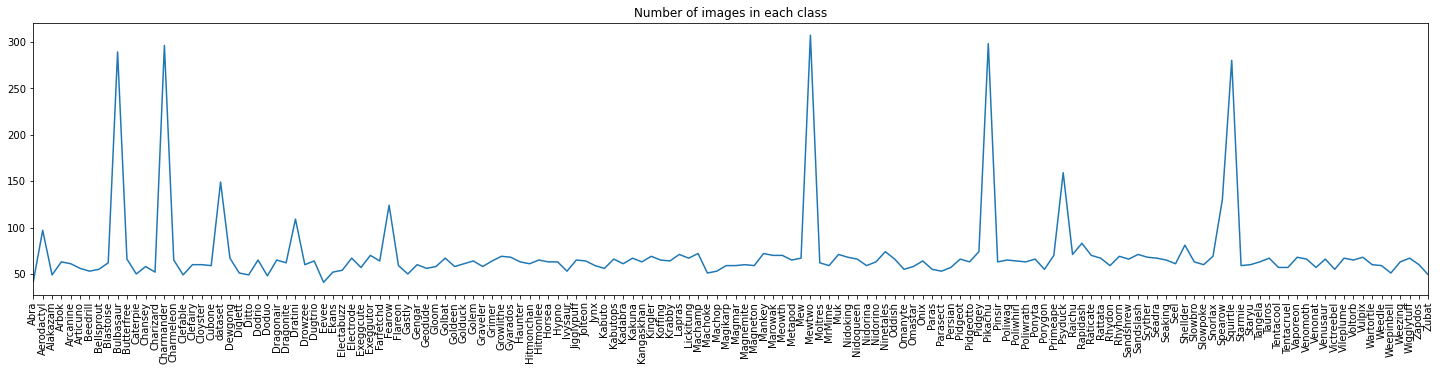

In [18]:
# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
# Plotting the data and cuonting how many classes are present and number of images present
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

#### There is class imbalence as some of the pokemons images are more than compared to other

In [19]:
# Sort our "counts" dictionary and selecting 10 classes with most number of images
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:10]
print(imbalanced)

[('Mewtwo', 307), ('Pikachu', 298), ('Charmander', 296), ('Bulbasaur', 289), ('Squirtle', 280), ('Psyduck', 159), ('dataset', 149), ('Spearow', 130), ('Fearow', 124), ('Dratini', 109)]


In [20]:
imbalanced = [i[0] for i in imbalanced]

In [8]:
# Now creating a list there images and there labels are stored

X = [] # List for images
Y = [] # List for labels

for c in classes:
    # We take only classes that we defined in 'imbalanced' list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        # the label is an index of class in 'imbalanced' list
        label = imbalanced.index(c)
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            # was getting errors of cannot read some images so i used try and except
            try:
                resized = cv.resize(image, (96, 96)) # Resizing images to (96, 96)
                X.append(resized)
                Y.append(label)
            
            # If can't read image then skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue  

C:/anirudh/assignment/DL_assignments/dataset\dataset\Abra [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Aerodactyl [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Alakazam [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Arbok [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Arcanine [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Articuno [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Beedrill [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Bellsprout [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Blastoise [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Bulbasaur [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\dataset\Butterfree [ERROR] can't read the file
C:/anirud

C:/anirudh/assignment/DL_assignments/dataset\Fearow\2c8d5221e92444f2b9477350e405bc54.svg [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\Fearow\8f2d7986ab76482fb76cac6a91b66de4.svg [ERROR] can't read the file
C:/anirudh/assignment/DL_assignments/dataset\Mewtwo\ed9eb0e7d3494c6992e06196f5b7cc05.svg [ERROR] can't read the file


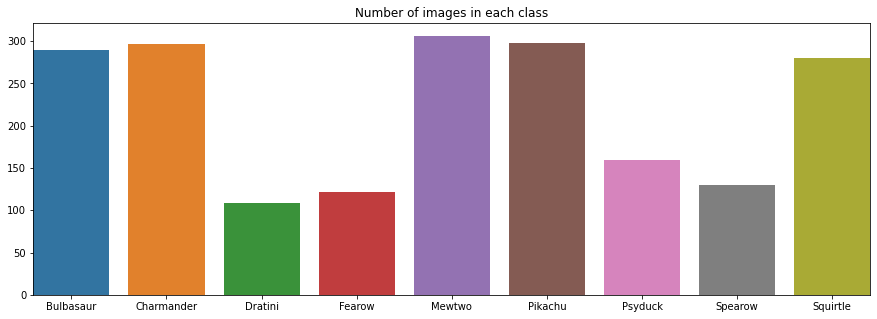

In [9]:
from collections import Counter
# Counting appearances of each label in labels list
obj = Counter(Y)

# Plotting number of images in each class
fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [imbalanced[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(imbalanced))

# Splitting data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 45, test_size= 0.2)

In [10]:
import PIL
from PIL import Image
from io import BytesIO


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint

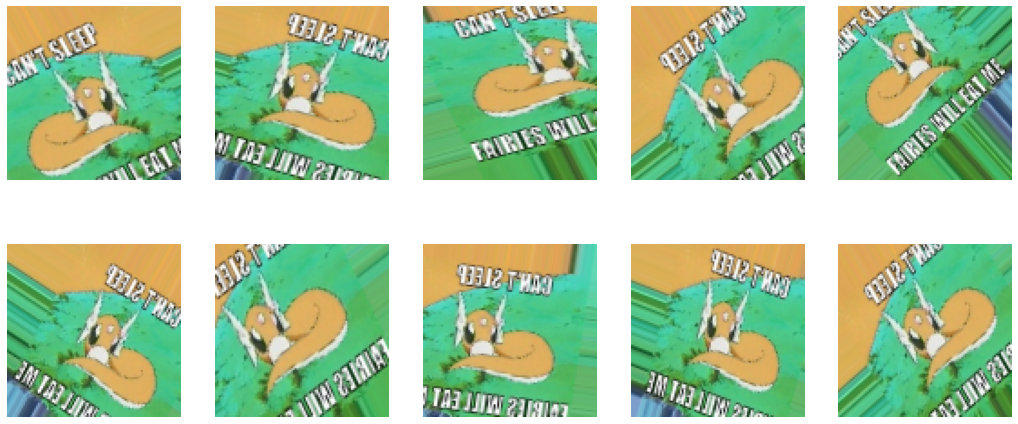

In [12]:
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

img = X[600]
img = img.reshape([-1, 96, 96, 3])

i = 0
fig = plt.figure(figsize = (18, 8))

for i, flow in enumerate(datagen.flow(img, batch_size = 1)):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(np.squeeze(flow[:, :, ::-1]))
    plt.axis('off')
    i += 1
    if i >= 10:
        break

In [13]:
# VGG arc
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
H = model.fit(x=X_train, y=y_train,batch_size=32,validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100
50/50 [==============================] - 53s 1s/step - loss: 2.0332 - accuracy: 0.4255 - val_loss: 6.3893 - val_accuracy: 0.2261
Epoch 2/100
50/50 [==============================] - 60s 1s/step - loss: 1.4050 - accuracy: 0.5908 - val_loss: 1.7013 - val_accuracy: 0.5302
Epoch 3/100
50/50 [==============================] - 49s 990ms/step - loss: 1.2452 - accuracy: 0.6285 - val_loss: 2.2751 - val_accuracy: 0.4698
Epoch 4/100
50/50 [==============================] - 49s 973ms/step - loss: 1.1222 - accuracy: 0.6587 - val_loss: 1.5596 - val_accuracy: 0.5352
Epoch 5/100
50/50 [==============================] - 46s 930ms/step - loss: 0.9265 - accuracy: 0.7096 - val_loss: 1.4271 - val_accuracy: 0.5528
Epoch 6/100
50/50 [==============================] - 49s 976ms/step - loss: 0.8121 - accuracy: 0.7480 - val_loss: 1.8155 - val_accuracy: 0.4899
Epoch 7/100
50/50 [==============================] - 49s 980ms/step - loss: 0.7809 - accuracy: 0.7561 - val_loss: 1.2838 - val_accuracy: 0.628

Epoch 58/100
50/50 [==============================] - 46s 917ms/step - loss: 0.2497 - accuracy: 0.9133 - val_loss: 0.7348 - val_accuracy: 0.8291
Epoch 59/100
50/50 [==============================] - 46s 909ms/step - loss: 0.1518 - accuracy: 0.9510 - val_loss: 0.5765 - val_accuracy: 0.8693
Epoch 60/100
50/50 [==============================] - 48s 954ms/step - loss: 0.0837 - accuracy: 0.9717 - val_loss: 0.5403 - val_accuracy: 0.8543
Epoch 61/100
50/50 [==============================] - 46s 929ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.5281 - val_accuracy: 0.8693
Epoch 62/100
50/50 [==============================] - 47s 944ms/step - loss: 0.0705 - accuracy: 0.9761 - val_loss: 0.6864 - val_accuracy: 0.8492
Epoch 63/100
50/50 [==============================] - 42s 843ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.5134 - val_accuracy: 0.8894
Epoch 64/100
50/50 [==============================] - 42s 843ms/step - loss: 0.0573 - accuracy: 0.9811 - val_loss: 0.5428 - val_ac

In [23]:
mewtwo = ['https://cdn.vox-cdn.com/thumbor/sZPPvUyKyF97UEU-nNtVnC3LpF8=/0x0:1750x941/1200x800/filters:focal(878x316:1158x596)/cdn.vox-cdn.com/uploads/chorus_image/image/63823444/original.0.jpg',
         'https://images-na.ssl-images-amazon.com/images/I/61j5ozFjJ0L._SL1024_.jpg']

pikachu = ['https://lh3.googleusercontent.com/proxy/DrjDlKlu9YonKbj3iNCJNJ3DGqzy9GjeXXSUv-TcVV4UN9PMCAM5yIkGLPG7wYo3UeA4sq5OmUWM8M6K5hy2KOAhf8SOL3zPH3axb2Xo3HX2XTU8M2xW4X6lVg=w720-h405-rw',
          'https://johnlewis.scene7.com/is/image/JohnLewis/237525467']

charmander = ['https://img.pokemondb.net/artwork/large/charmander.jpg',
             'https://www.pokemoncenter.com/wcsstore/PokemonCatalogAssetStore/images/catalog/products/P5073/701-03990/P5073_701-03990_01.jpg',
             'https://static.posters.cz/image/750/%D0%A7%D0%B0%D1%88%D0%BA%D0%B0/pokemon-charmander-glow-i72513.jpg']

bulbasaur = ['https://img.pokemondb.net/artwork/large/bulbasaur.jpg',
            'https://cdn.vox-cdn.com/thumbor/Zl7Wrnbp1UQWNlentqkGBcV4eCw=/0x0:1436x596/920x613/filters:focal(604x184:832x412):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63847623/bulbasaur.0.png']

squirtle = ['https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png',
           'https://cdn.vox-cdn.com/thumbor/l4cKX7ZWargjs-zlxOSW2WZVgfI=/0x0:2040x1360/1200x800/filters:focal(857x517:1183x843)/cdn.vox-cdn.com/uploads/chorus_image/image/61498573/jbareham_180925_ply0802_0030.1537570476.jpg',
           'https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fdavidthier%2Ffiles%2F2018%2F07%2FSquirtle_Squad.jpg']

test_df = [mewtwo, pikachu, charmander, bulbasaur, squirtle]

https://cdn.vox-cdn.com/thumbor/sZPPvUyKyF97UEU-nNtVnC3LpF8=/0x0:1750x941/1200x800/filters:focal(878x316:1158x596)/cdn.vox-cdn.com/uploads/chorus_image/image/63823444/original.0.jpg
https://images-na.ssl-images-amazon.com/images/I/61j5ozFjJ0L._SL1024_.jpg
https://lh3.googleusercontent.com/proxy/DrjDlKlu9YonKbj3iNCJNJ3DGqzy9GjeXXSUv-TcVV4UN9PMCAM5yIkGLPG7wYo3UeA4sq5OmUWM8M6K5hy2KOAhf8SOL3zPH3axb2Xo3HX2XTU8M2xW4X6lVg=w720-h405-rw
https://johnlewis.scene7.com/is/image/JohnLewis/237525467
https://img.pokemondb.net/artwork/large/charmander.jpg
https://www.pokemoncenter.com/wcsstore/PokemonCatalogAssetStore/images/catalog/products/P5073/701-03990/P5073_701-03990_01.jpg
https://static.posters.cz/image/750/%D0%A7%D0%B0%D1%88%D0%BA%D0%B0/pokemon-charmander-glow-i72513.jpg
https://img.pokemondb.net/artwork/large/bulbasaur.jpg
https://cdn.vox-cdn.com/thumbor/Zl7Wrnbp1UQWNlentqkGBcV4eCw=/0x0:1436x596/920x613/filters:focal(604x184:832x412):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/638

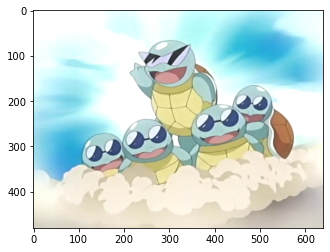

In [25]:
val_x = []
val_y = []

import numpy as np
import urllib
import cv2

for i, urls in enumerate(test_df):
    for url in urls:
        print(url)
        r = requests.get(url, stream = True).raw
        image = np.asarray(bytearray(r.read()), dtype="uint8")
        image = cv2.imdecode(image, cv.IMREAD_COLOR)
        val_x.append(image)
        val_y.append(i)

plt.imshow(image[:, :, ::-1])

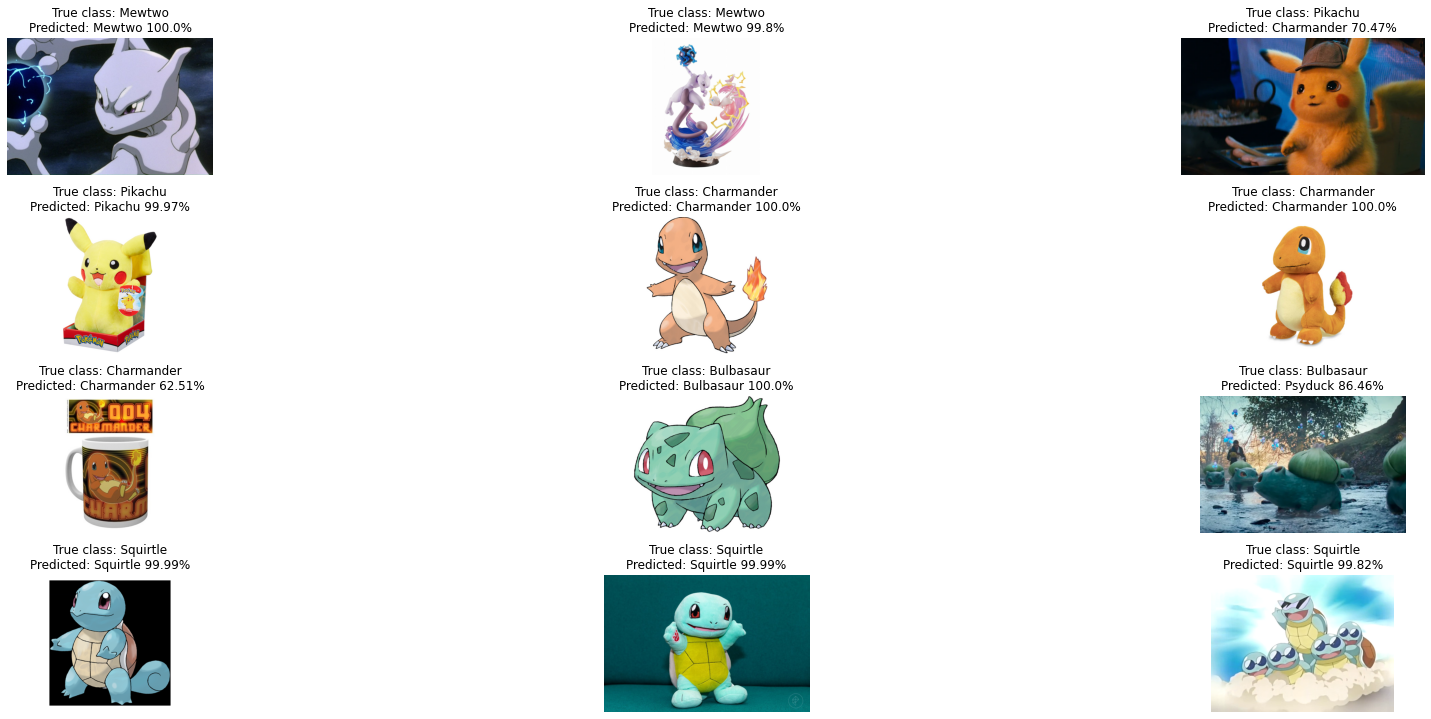

In [26]:
rows = 4
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): 
    # Original
    orig = j[0] 
    # Label for that image
    label = j[1] 
    
    image = cv.resize(orig, (96, 96))
    image = image.reshape(-1, 96, 96, 3) / 255.0
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {imbalanced[label]}'
    pred_label = f'Predicted: {imbalanced[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()